<a href="https://colab.research.google.com/github/simranbajwa13/NLP-Essentials-for-Machine-Learning-with-Python/blob/main/NLPAssignment3_Simranjeet_kaur_200740827.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Version 1.3 20210712

In this assignment we will use distributional semantics to investigate how some words in the English language changed over the course of the last two centuries. To do so, we will use two sections from the **Corpus of Historical American English (COHA)** - one with texts written between 1800 and 1840, and a contemporary one with texts written between 2000 and 2010. 

In distributional semantics, we use the context of a word to represent its meaning. In the first part of this assignment we will use simple bi-gram statistics to get a first feel for how words' co-occurrences can reflect their meaning, then move to two more refined sampling methods called **Continuous Bag of Words (CBOW)** and **SkipGram** which frequently used in developing distributional semantics models, and finally train a full **Word2Vec model** on the two corpora and investigate how certain words have developed over time by comparing their representations.

You can download the COHA data for this assignment from here:

https://drive.google.com/drive/folders/13Kzo666XmYLQv8VMjR8Xc_P6f0-mrlY_?usp=sharing

**DISCLAIMER**: You are given permission to use the COHA data only for this assignment. You are not allowed to use the data for other projects, and you are not allowed to distribute it in any form. 

---

FURTHER READING:

*    Distributional Semantics and Linguistic Theory. Boleda, 2020


# Q1 Word Co-occurrence Vectors 

To start off, we will calculate word co-occurrence statistics from a sample of the two portions of the COHA texts, and build word vectors based on the co-occurrence counts.


## Q1.1 Pre-processing 

First, complete the pre-processing function so that it returns a cleaned version as a list of sentences. Consider how different pre-processing steps will affect the co-occurrence statistics and report why you decide to include or exclude specific pre-processing steps.


In [ ]:
import nltk
from nltk import word_tokenize, sent_tokenize
import string,re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import time
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def load_sentences(file):
    """
    Reads a COHA sample file and pre-processes it into a list of strings.
    """
    sentences = []
    with open(file) as f:
        for line in f:
            sentences.append(line)          
    return sentences

In [ ]:
def preprocessing(corpus):
    """
    Takes a collection of sentences and returns a cleaned version. 
    
    Complete this function by applying techniques like tokenisation, 
    non-word filtering, stop-word removal and stemming to clean the input.
    
    :return : a list of strings containing cleaned sentences
    :rtype : list(str)
    """
    
    clean_text = []
    # TODO: Pre-process corpus and add cleaned sentences to clean_text
    for words in corpus:
      words=words.lower()
      word_p = "".join([char for char in words if char not in string.punctuation])
      words = word_tokenize(word_p)
      stop_words = stopwords.words('english')
      final_words = ' '.join([word for word in words if word not in stop_words])
      clean_text.append(final_words)    
    return clean_text

   

## Q1.2 Extracting co-occurrence counts 

Building a word co-occurrence matrix directly can cause memory usage problems: the target/context word matrix can have of the order of 100,000 rows and columns (the size of the observed vocabulary). One way to get round this is to use sparse matrices, which are memory- and computation-efficient - but they can be a bit complicated to work with if you're not used to them. Here, we will take a different approach: we'll use the existing CountVectorizer class to do the work for us (it uses sparse matrix libraries underneath). This means doing something slightly different from the standard approach described in lectures: instead of basing our co-occurrence counts on a sliding fixed-width window, we will be basing them on co-occurrence of words within the same sentence.



In [ ]:
def create_coo_matrix(data, vectorizer):
    """
    Uses the specified vectorizer to create bi-gram co-occurence statistics 
    for the data.

    Complete this function by applying the vectorizer to the corpus data to 
    create a co-occurrence matrix. Then transform the matrix into a symmetric 
    one by transposing and multiplying it, and set the diagonal to zero. 

    :return : a square matrix indicating bi-gram co-occurrence statistics
    :rtype : pd.DataFrame
    """
    start = time.time()

    # TODO: Apply CountVectorizer to data, resulting in a word/sentence matrix
    vector = vectorizer.fit_transform(data)
    # TODO: Transpose matrix and multiply original by transpose, resulting in a word/word matrix
    coo_matrix = (vector.T * vector)
    # TODO: Set diagonal to zero
    coo_matrix.setdiag(0)

    # Extract the matrix' word index from the vectorizer
    word_index = vectorizer.get_feature_names() 
    # Create an easy-to-read version of the matrix with pandas
    coo_df = pd.DataFrame(data = coo_matrix.toarray(), columns = word_index, index = word_index)

    end = time.time()    
    print("Building the co-occurrence matrix took {} seconds.".format(end - start)) 
    return coo_df

In [ ]:
# Initialise the CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1), stop_words = 'english', min_df = 5)

In [ ]:
# Load the sample of the 1800-1840 section of COHA
sample_1800=load_sentences("/content/1800_sample.txt")
print("The sample contains {} sentences.".format(len(sample_1800)))

# Pre-process the data and establish a bi-gram co-occurence matrix with the CountVectorizer
sample_1800_clean = preprocessing(sample_1800)
coo_df_1800 = create_coo_matrix(sample_1800_clean, vectorizer)

The sample contains 50000 sentences.
Building the co-occurrence matrix took 1.5808653831481934 seconds.


In [ ]:
# Print the first sentence in the 1800-1840 section
sample_1800_clean[0]

'true principle conservatism'

In [ ]:
# Load the sample of the 2000-2010 section of COHA
sample_2000=load_sentences("/content/2000_sample.txt")
print("The sample contains {} sentences.".format(len(sample_2000)))

# Pre-process the data and establish a bi-gram co-occurence matrix with the CountVectorizer
sample_2000_clean = preprocessing(sample_2000)
coo_df_2000 = create_coo_matrix(sample_2000_clean, vectorizer)

The sample contains 50000 sentences.
Building the co-occurrence matrix took 1.3859777450561523 seconds.


In [ ]:
# Print the first sentence in the 2000-2010 section
sample_2000_clean[0]

'revenge randal reeserat chapter one elizabeth madrat loved warm tropical places midday african sun could take'

## Q1.3 Corpus Analysis

Now that we have simple co-occurrence statistics, we can start investigating how words were used in the two different periods - and how this changed between the two periods in our data. 

We can do this in two ways: (a) examine the co-occurrence counts directly to analyse pairwise co-occurrence, and (b) use the rows of our co-occurrence matrix as word vectors, and examine the similarity between them.

First, for method (a), extract the 15 words that co-occur most often with the word 'war' in the two co-occurrence matrices and report any iteresting findings. 

Next, for method (b), use cosine similarity to determine the similarity of the co-occurrence vectors of the words 'fight' and 'sword' first in the 1800-1840 section, and then in the 2000-2010 portion. Report what you observe.


In [ ]:
# TODO: Determine the 15 words that co-occur most often with 'war' in the 1800-1840 section
a=coo_df_1800.nlargest(15,['war'])
b=a.index
print(np.array(b))

['unk' '1kb' 'footnote' 'great' 'said' 'like' 'thy' 'life' 'close' 'men'
 'old' 'arms' 'certain' 'far' 'state']


In [ ]:
# TODO: Determine the 15 words that co-occur most often with 'war' in the 2000-2010 section
a=coo_df_2000.nlargest(15,['war'])
b=a.index
print(np.array(b))

['world' 'unk' 'ii' 'intelligence' 'new' 'civil' 'cold' 'end' 'people'
 'nt' 'time' 'american' 'years' 'medal' 'said']


In [ ]:
# TODO: Determine the cosine similarity between the words 'fight' and 'sword' in the 1800-1840 section
import sklearn
from scipy import spatial
a = 1 - spatial.distance.cosine(coo_df_1800['fight'], coo_df_1800['sword'])
print(a)

0.628228553848703


In [ ]:
# TODO: Determine the cosine similarity between the words 'fight' and 'sword' in the 2000-2010 section
a = 1 - spatial.distance.cosine(coo_df_2000['fight'], coo_df_2000['sword'])
print(a)

0.16258207305064132


In [ ]:
# OPTIONAL: Explore other words or word pairs that might be interesting to compare
a = 1 - spatial.distance.cosine(coo_df_2000['war'], coo_df_2000['arrow'])
d = 1 - spatial.distance.cosine(coo_df_2000['gun'], coo_df_2000['war'])
print(a)
print(d)

0.10305792481113552
0.2217732359137451


In [ ]:
a = 1 - spatial.distance.cosine(coo_df_1800['war'], coo_df_1800['arrow'])
print(a)

0.37416293709987647


# Q2 Understanding Word2Vec Training 

Co-occurrence count vectors are a bit limited in how well they model word meaning and change, and it's more usual to use more advanced word-vectorization methods like Word2Vec. Word2Vec can use two different methods to specify or sample a target word's context: the Continuous Bag of Words (CBOW) and SkipGram models. In this part, you'll be tasked to implement these two approaches to understand how they sample and represent word co-occurrence in context.



## Q2.1 Continuous Bag of Words (CBOW) (5 marks)

The first method is CBOW (Continuous Bag Of Words):


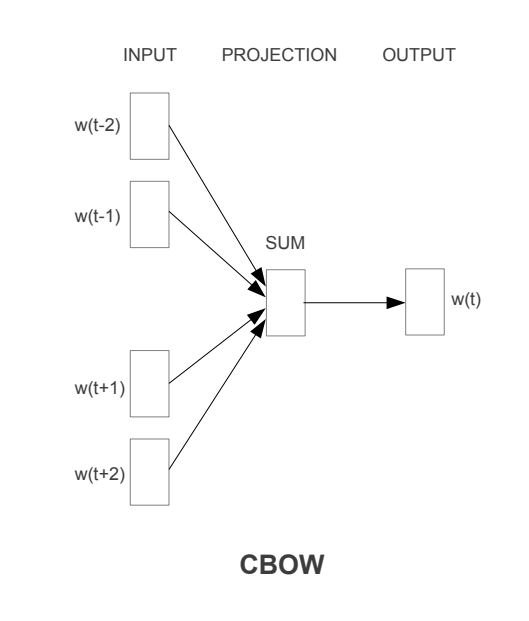

With CBOW, we use the left and right context of a target word to try to predict the target. To create training data for CBOW, we therefore have to create sliding context windows that collect a given number of previous and following words as context, and link those contexts to the targets. For this assignment, we'll use a window size of 2, so we'll look at the two words before and the two words after a word in the corpus and consider that to be its context. You do not need to add padding, but should skip words that don't have enough words to the left or to the right to fill the full context window.

As an example, processing the sentence "The quick brown fox jumped over the lazy dog" should yield the following output:

```
[(['The', 'quick', 'fox', 'jumped'], 'brown'),
 (['quick', 'brown', 'jumped', 'over'], 'fox'),
 (['brown', 'fox', 'over', 'the'], 'jumped'),
 (['fox', 'jumped', 'the', 'lazy'], 'over'),
 (['jumped', 'over', 'lazy', 'dog'], 'the')]
```
The first part of each tuple is the context, which in our case is 4 words (2 left and 2 right), and the second entry is the target (which should go in the middle of the context). 



In [ ]:
def create_cbow_dataset(data, window_size):
    """
    Creates a dataset of CBOW contexts for a given corpus. The context size is 
    determined by window_size to the right and to the left of the target. 

    Complete this function by processing the data and adding words with their 
    corresponding contexts to the cbow_data list. You do not need to add padding,
    but should skip words that don't have enough words to the left or to the 
    right to fill the full context window. Make sure that the output is a single 
    list of target-context pairs, and that they are not separated by sentence.

    See the sample output in the next field as reference

    :return : a list of tuples representing a context and it's target
    :rtype : [(str, [str])]
    """
    cbow_data = []    
    # TODO: Process the data into target-context tuples using the specified window size
    sent = str(data)
    sent=sent.replace("[","")
    sent=sent.replace("]","")
    words=sent.split(" ")
    
    for i in range(window_size,len(words)-window_size-1):
      a=[]
      a.append(words[i-2])
      a.append(words[i-1])
      a.append(words[i+1])
      a.append(words[i+2])
      b=(a,words[i])
      cbow_data.append(b)            
    return cbow_data

In [ ]:
# CBOW Sample
create_cbow_dataset(["The quick brown fox jumped over the lazy dog"], 2)

[(["'The", 'quick', 'fox', 'jumped'], 'brown'),
 (['quick', 'brown', 'jumped', 'over'], 'fox'),
 (['brown', 'fox', 'over', 'the'], 'jumped'),
 (['fox', 'jumped', 'the', 'lazy'], 'over')]

Output should be:

```
[(['The', 'quick', 'fox', 'jumped'], 'brown'),
 (['quick', 'brown', 'jumped', 'over'], 'fox'),
 (['brown', 'fox', 'over', 'the'], 'jumped'),
 (['fox', 'jumped', 'the', 'lazy'], 'over'),
 (['jumped', 'over', 'lazy', 'dog'], 'the')]
```



## Q2.2: Skip-Gram 

The second method is the Skip-Gram model:

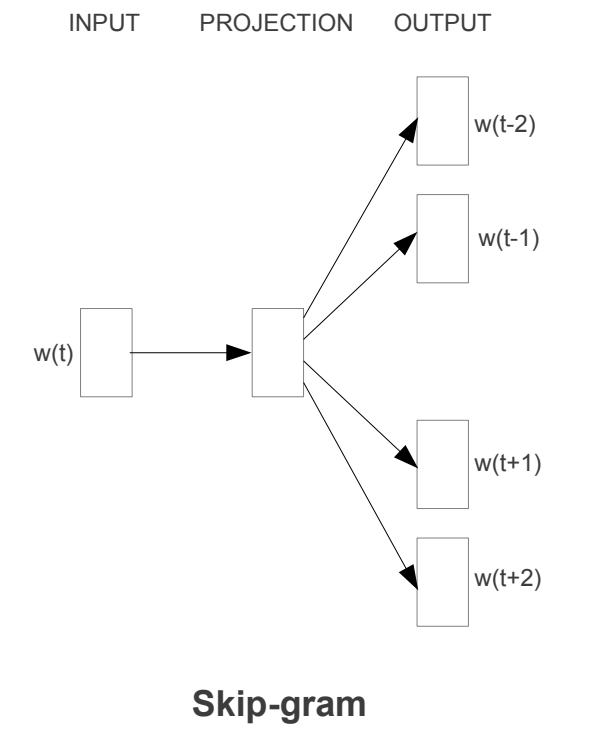

With SkipGrams, we go the other way round: given a word, we want to predict its context. However, this is quite heavy on training, so we simplify the task a little: Given two words, determine whether they are neighbours (whithin the range of the window size) in the corpus. For this assignment, we'll again use a window size of 2, so we'll look at the two words before and the two words after a word in the corpus and consider that to be its context. You do not need to add padding, but should skip words that don't have enough words to the left or to the right to fill the full context window.

Instead of adding the full context as training instance, in this case we create triplets containing the target, one of its context words, and a binary indicator to show that they are neighbours. So processing the sentence "The quick brown fox jumped over the lazy dog" should yield samples like

```
[('brown', 'The', 1),
 ('brown', 'quick', 1),
 ('brown', 'fox', 1),
 ('brown', 'jumped', 1),
 ('fox', 'quick', 1),
 ('fox', 'brown', 1),
 ...]
```
Besides adding these positive samples, we can further speed up training by adding negative samples. To create negative samples, we simply pick a number of random words from the corpus and asssign them a negative binary flag, e.g.

```
('brown', 'timer', 0)
```
For this assignment, we'll add the same number of negative samples as positive ones for each target, so there should be a total of 8 entries for each target word in the corpus. To make the negative samples more helpful, we also only want to use random words that appear at least 10 times in the corpus. You can again use the CountVectorizer to build this vocabulary.


In [ ]:
import random

In [ ]:
def create_skipgram_dataset(data, window_size):
    """
    Creates a SkipGram dataset for a given corpus. The context size is 
    determined by window_size to the right and to the left of the target. 

    Complete this function establishing a vocabulary from the corpus, where 
    each word should appear at least 10 times. You can use the CountVectorizer 
    for this, too.
    Then process sentences like your did for CBOW, but adding training samples
    as triplets (target, context_word, flag). 
    Finally, add the same number of negative samples for each target word by 
    selecting random words from the vocabulary and adding them as negative 
    instances.

    :return : a list of triplets representing a target, a context word, and a 
              binary flag indicating whether they are neighbours
    :rtype : [(str, str, bool)]
    """
    skip_data = []

    # TODO: Build a vocabulary with a minimum occurrence threshold of 10

    # TODO: Add positive samples for a target and its context words

    # TODO: Add the same number of negative samples for each target. 
    # To implement the negative sampling, pick random words from the 
    # vocabulary you created. 
    v = CountVectorizer(min_df = 10)
    v2=v.fit_transform(data)
    words = v.get_feature_names()
    sent = str(data)
    sent=sent.replace("[","")
    sent=sent.replace("]","")
    sent=sent.replace("'","")
    sent=sent.replace(",","")
    word=sent.split(" ")
    for x in range(window_size,len(word)-window_size):
      a=word[x]
      for y in range(x-window_size,x+window_size+1):
        if y!=x:
          b=(a,word[y],1)
          skip_data.append(b)
      for z in range(x-window_size,x+window_size+1):
        if z!=x:
          c=random.choice(words)
          d=(a,c,0)
          skip_data.append(d)
    return skip_data

In [ ]:
create_skipgram_dataset(sample_1800_clean, 2)[:8]

[('conservatism', 'true', 1),
 ('conservatism', 'principle', 1),
 ('conservatism', 'rather', 1),
 ('conservatism', 'principle', 1),
 ('conservatism', '1kb', 0),
 ('conservatism', 'existed', 0),
 ('conservatism', 'age', 0),
 ('conservatism', 'brains', 0)]

Output should be similar to

```
[('conservatism', 'rather', 1),
 ('conservatism', 'principle', 1),
 ('conservatism', 'true', 1),
 ('conservatism', 'society', 1),
 ('conservatism', 'parts', 0),
 ('conservatism', 'struggling', 0),
 ('conservatism', 'smiling', 0),
 ('conservatism', 'intent', 0)]
```



# Q3 Word2Vec 

Now that we know how to create the training data for distributional semantics tools, we'll use a pre-implemented version of Word2Vec (which usually uses SkipGram training) to speed things up a little. Word2Vec is still one of the most-used approaches to create static word embeddings - and we'll use it to learn word embeddings for the two different periods of the COHA data to get a better idea of how word meaning has changed over time. 

This time we provide you with the full code, and your job lies in investigating the results. 


## Q3.1 Building Word2Vec embeddings 

We'll start with word embeddings (i.e. word vectors) of size 50 - which means that the full co-occurrence matrix is compressed into a lower dimensionality - but dimensions carry more information than they do in the sparse matrix, and double the window size to 4. Depending on your machine, **training the models might take between 5 and 10 minutes each**. 

Use the code given here to train two models, one for each of the time period corpora.

Again, check the 15 most similar words to 'war' in both corpora, and determine the cosine similarity between the word pairs 'fight' and 'sword' in the two different corpora. Report what you find.



In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 23.9 MB 99 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim
from gensim.models import Word2Vec

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
assert gensim.__version__ == '4.0.1', "Please run '!pip install --upgrade gensim' to udpate gensim to version 4.0.1"

In [ ]:
def load_period(file):
    start = time.time()
    sentences = []
    with open(file) as f:
        for line in f:
            sentences.extend([word_tokenize(s) for s in sent_tokenize(line)])
    end = time.time()
    
    print("Processing took {} seconds.".format(end - start))
    print("The period contains {} sentences.".format(len(sentences)))
            
    return sentences

In [ ]:
start = time.time()

model_1800 = Word2Vec(sentences=load_period("/content/1800.txt"), vector_size=50, window=2, min_count=1, workers=4)
model_1800.save("1800_word2vec.model")

end = time.time()
print("Training the model took {} seconds.".format(end - start))

Processing took 196.521390914917 seconds.
The period contains 965249 sentences.
Training the model took 376.47104835510254 seconds.


In [ ]:
# Uncomment this line if you want to load a pre-trained model instead of training it again.
model_1800 = Word2Vec.load("1800_word2vec.model")

In [ ]:
start = time.time()

model_2000 = Word2Vec(sentences=load_period("/content/2000_half.txt"), vector_size=50, window=2, min_count=1, workers=4)
model_2000.save("2000_word2vec.model")

end = time.time()
print("Training the model took {} seconds.".format(end - start))

Processing took 164.59624433517456 seconds.
The period contains 950389 sentences.
Training the model took 303.1595551967621 seconds.


In [ ]:
# Uncomment this line if you want to load a pre-trained model instead of training it again.
model_2000 = Word2Vec.load("2000_word2vec.model")

In [ ]:
# TODO: Determine the 15 words that are most similar to 'war' in the 1800-1840 section
w = model_1800.wv.most_similar(['war'], [], 15)
print(w)

[('rebellion', 0.7822636365890503), ('contest', 0.7740381956100464), ('struggle', 0.7335736155509949), ('revolution', 0.7302173376083374), ('conflict', 0.7115897536277771), ('wars', 0.7091193795204163), ('revolt', 0.6858429908752441), ('battle', 0.6827458739280701), ('warfare', 0.682500958442688), ('neutrality', 0.6696780323982239), ('insurrection', 0.6645654439926147), ('administration', 0.6595759987831116), ('strife', 0.6573236584663391), ('government', 0.6499524712562561), ('negotiation', 0.6493876576423645)]


In [ ]:
# TODO: Determine the 15 words that are most similar to 'war' in the 2000-2010 section
w = model_2000.wv.most_similar(['war'], [], 15)
print(w)

[('battle', 0.8237202167510986), ('crisis', 0.7803723812103271), ('Iraq', 0.7771872878074646), ('debate', 0.7622318863868713), ('conflict', 0.7541713118553162), ('court', 0.7480322122573853), ('dispute', 0.7475731372833252), ('race', 0.7458547949790955), ('trial', 0.7447536587715149), ('government', 0.7431585192680359), ('state', 0.7384852766990662), ('disaster', 0.7288514971733093), ('Afghanistan', 0.7236635684967041), ('military', 0.7150266170501709), ('battlefield', 0.7125157117843628)]


In [ ]:
# TODO: Determine the cosine similarity between the words 'fight' and 'sword' in the 1800-1840 section
w = model_1800.wv.similarity('fight','sword')
print(w)

0.35993528


In [ ]:
# TODO: Determine the cosine similarity between the words 'fight' and 'sword' in the 2000-2010 section
w = model_2000.wv.similarity('fight','sword')
print(w)

0.3323468


## Q3.2 Examining meaning change over time 

Pick three additional words that you think might have changed their meaning over time, and investigate them using the two models. Note that you **can't directly compare individual embeddings (vectors) between the two different models**, as they are randomly initialised and therefore vectors will not correspond to one another. However, you can always compare pairwise similarities, i.e. the distances between word pairs in the two different corpora.

For example, for each of your three words, you could choose two words that are likely to be similar in meaning in the different time periods, and check whether the similarities change as you expect. But don't feel limited by this suggestion - feel free to investigate the similarities however you like.


**we can choose 3 words: Attack, Battle & Fight**


In [ ]:
# Comparing the words which are similar to ATTACK in the 1800's and 2000's
model_1800.wv.most_similar(positive=["attack"], topn = 15)



[('assault', 0.8933718204498291),
 ('inspection', 0.7659430503845215),
 ('expedition', 0.7632918357849121),
 ('act', 0.7590574026107788),
 ('issue', 0.7341964840888977),
 ('experiment', 0.7288033962249756),
 ('admission', 0.7235120534896851),
 ('enemy', 0.7159188389778137),
 ('combat', 0.7094502449035645),
 ('onset', 0.7093818783760071),
 ('opposition', 0.7062201499938965),
 ('execution', 0.6957053542137146),
 ('arrest', 0.6930030584335327),
 ('insurrection', 0.6927081942558289),
 ('trial', 0.692103922367096)]

In [ ]:
model_2000.wv.most_similar(positive=["attacks"], topn = 15)

[('allegations', 0.746933102607727),
 ('sanctions', 0.7354673743247986),
 ('assault', 0.7353775501251221),
 ('violence', 0.7348802089691162),
 ('attack', 0.7289848327636719),
 ('threats', 0.7162365913391113),
 ('crimes', 0.7121348977088928),
 ('casualties', 0.710472047328949),
 ('charges', 0.7098977565765381),
 ('impacts', 0.7082316279411316),
 ('disputes', 0.7024964690208435),
 ('terrorism', 0.698065996170044),
 ('reforms', 0.6973910331726074),
 ('debates', 0.6909905076026917),
 ('regimes', 0.6858128309249878)]

**Observation**:

As we can observe that in 1800'sthe words which very similar to attack are - assault, inspecttion, expedition.

Whereas, 

As we can observe that in 2000's the words which very similar to attack are - sanctions, threats, attack, crime. 

We can conculde that words like crime and treats are a bit used in the modern era (2000's) which is quite evident seeing from the top 10 list of similar words. As we know that attack, crime are words which are very commonly used as synonyms and have the similar meaning. Still these synonyms for the word attack are not commonly used in old era (1800s). So yes we can say that the meaniing of this word has evolve over time. 

In the following section, let us examine how similar the 3 words that we havee choosen are similar to each other w.r.t the time.

Determine the cosine similarity between the words 'attack' and 'battle' in the 1800-1840 section

In [ ]:
cosine_sim_1800_1 = model_1800.wv.similarity('attack', 'battle')
print("cosine similarity between the words 'attack' and 'battle': ", cosine_sim_1800_1)

cosine similarity between the words 'attack' and 'battle':  0.56481695


In [ ]:
cosine_sim_2000_1 = model_2000.wv.similarity('attack', 'battle')
print("cosine similarity between the words 'attack' and 'battle': ", cosine_sim_2000_1)

cosine similarity between the words 'attack' and 'battle':  0.63953114


**Observation**:
As we can observe that in 1800's the similarity betweeen the word attck and battle is only 0.56 whereas the similarity betweeen the word attack and battle in 2000's increased to 0.63. From this we can concluse that the word battle was less similar in the year 1800's but was more similar in the year 2000's and as we know that these words are very similar words were:

Attack : an aggressive and violent act against a person or place (mostly used in modern era)

Battle is used more in 1800's when there was a violent fight against a group of people.

In [ ]:
cosine_sim_1800_2 = model_1800.wv.similarity('attack', 'fight')
print("cosine similarity between the words 'attack' and 'fight': ", cosine_sim_1800_2)

cosine similarity between the words 'attack' and 'fight':  0.55800354


In [ ]:
cosine_sim_2000_2 = model_2000.wv.similarity('attack', 'fight')
print("cosine similarity between the words 'attack' and 'fight': ", cosine_sim_2000_2)

cosine similarity between the words 'attack' and 'fight':  0.6239654


**Observation**:
As we can observe that in 1800's the similarity betweeen the word attack and fight is only 0.55 whereas the similarity betweeen the word attack and battle in 2000's increased to 0.62.

We can conclude that in both the scenario, attack and fight having the same meaning were having low similarity in 1800's but had more similarities in 2000's.

